## E-Commerce Sales Forcast Analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#pip install openpyxl

## Read the data

In [3]:
# Read in the data
data = pd.read_excel("data/Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# transfer data type of CustomerID to int
data['CustomerID'] = data['CustomerID'].fillna(0).astype(int)

## EDA

### Missing values
the overall missing value situations


In [8]:
missing_percentage = data.isnull().sum() / data.shape[0] * 100
missing_percentage

InvoiceNo      0.000000
StockCode      0.000000
Description    0.268311
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
dtype: float64

In [9]:
# Create a dict to match Description with StockCode 
stockcode_desc_map = data.groupby('StockCode')['Description'].apply(
    lambda x: x.dropna().mode()[0] if not x.dropna().empty else None).to_dict()
data['Description'] = data['StockCode'].map(stockcode_desc_map)


In [10]:
missing_percentage = data.isnull().sum() / data.shape[0] * 100
missing_percentage

InvoiceNo      0.000000
StockCode      0.000000
Description    0.020668
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
dtype: float64

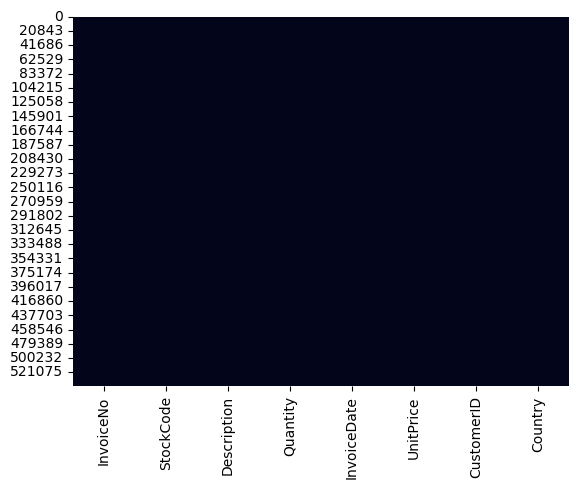

In [11]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [12]:
data[data["Description"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,None,1,2010-12-01 14:32:00,0.0,0,United Kingdom
1987,536549,85226A,None,1,2010-12-01 14:34:00,0.0,0,United Kingdom
1988,536550,85044,None,1,2010-12-01 14:34:00,0.0,0,United Kingdom
2024,536552,20950,None,1,2010-12-01 14:34:00,0.0,0,United Kingdom
2026,536554,84670,None,23,2010-12-01 14:35:00,0.0,0,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,None,-14,2011-07-27 14:10:00,0.0,0,United Kingdom
281615,561555,37477B,None,-11,2011-07-28 10:21:00,0.0,0,United Kingdom
281616,561557,37477C,None,-31,2011-07-28 10:21:00,0.0,0,United Kingdom
346849,567207,35592T,None,4,2011-09-19 11:01:00,0.0,0,United Kingdom


In [13]:
# 加一列，当quantity<0时显示为returned，quantity>0显示为purchased
data["InvoiceType"] = np.where(data["Quantity"] < 0, "returned", "purchase")


In [14]:
# 加一列，当customerID为0时显示为non-member，else 为member
data['Membership'] = np.where(data['CustomerID'] == 0, 'non-member', 'member')
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceType,Membership
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,purchase,member
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,purchase,member
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,purchase,member
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,purchase,member
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,purchase,member


In [15]:
unique_customers = data["CustomerID"].nunique()
unique_customers

4373

In [16]:
# All invoice number
data.groupby("InvoiceNo")["Membership"].apply(lambda x: (x == "non-member").sum())

InvoiceNo
536365     0
536366     0
536367     0
536368     0
536369     0
          ..
C581484    0
C581490    0
C581499    0
C581568    0
C581569    0
Name: Membership, Length: 25900, dtype: int64

In [17]:
# Non-member invoice number
non_member_invoice_count = (data.groupby("InvoiceNo")["Membership"].first() == "non-member").sum()
print(non_member_invoice_count)

3710


In [18]:
# Mmember invoice number
non_member_invoice_count = (data.groupby("InvoiceNo")["Membership"].first() == "member").sum()
print(non_member_invoice_count)

22190


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541797 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
 8   InvoiceType  541909 non-null  object        
 9   Membership   541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 41.3+ MB


In [23]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(data["Description"].astype(str))  

n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data["Category"] = kmeans.fit_predict(X)  

print(data[["Description", "Category"]].head(20))

                            Description  Category
0    WHITE HANGING HEART T-LIGHT HOLDER         2
1                   WHITE METAL LANTERN         4
2        CREAM CUPID HEARTS COAT HANGER         4
3   KNITTED UNION FLAG HOT WATER BOTTLE         4
4        RED WOOLLY HOTTIE WHITE HEART.         0
5          SET 7 BABUSHKA NESTING BOXES         4
6     GLASS STAR FROSTED T-LIGHT HOLDER         2
7                HAND WARMER UNION JACK         4
8             HAND WARMER RED RETROSPOT         4
9         ASSORTED COLOUR BIRD ORNAMENT         4
10           POPPY'S PLAYHOUSE BEDROOM          4
11            POPPY'S PLAYHOUSE KITCHEN         4
12    FELTCRAFT PRINCESS CHARLOTTE DOLL         4
13              IVORY KNITTED MUG COSY          4
14   BOX OF 6 ASSORTED COLOUR TEASPOONS         4
15        BOX OF VINTAGE JIGSAW BLOCKS          4
16       BOX OF VINTAGE ALPHABET BLOCKS         4
17             HOME BUILDING BLOCK WORD         4
18             LOVE BUILDING BLOCK WORD         4


In [24]:
# Try another model
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10  
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
topic_matrix = lda.fit_transform(X)

data["Category"] = topic_matrix.argmax(axis=1)


In [25]:
data.head(1000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceType,Membership,Category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,purchase,member,9
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,purchase,member,9
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,purchase,member,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,purchase,member,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,purchase,member,1
...,...,...,...,...,...,...,...,...,...,...,...
995,536520,22469,HEART OF WICKER SMALL,1,2010-12-01 12:43:00,1.65,14729,United Kingdom,purchase,member,0
996,536520,22100,SKULLS SQUARE TISSUE BOX,1,2010-12-01 12:43:00,1.25,14729,United Kingdom,purchase,member,4
997,536520,22096,PINK PAISLEY SQUARE TISSUE BOX,1,2010-12-01 12:43:00,1.25,14729,United Kingdom,purchase,member,4
998,536520,22583,PACK OF 6 HANDBAG GIFT BOXES,1,2010-12-01 12:43:00,2.55,14729,United Kingdom,purchase,member,6
